<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Advanced Regression Implementation</h1>
Copyright Machine Learning Plus
</div>

### Content : 
1. Partial Least Squares
2. Polynomial Regression
3. RANSAC Regression
4. Theil Sen Regression
5. Quantile Regression 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Partial Least squares</h2>
</div>

### Load libraries

In [ ]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load Data

In [ ]:
# Load the data
df = pd.read_csv("Datasets/hoursing_df_cleaned.csv", usecols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath'])
df.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,6,1960,1080.0,1656,1656,1,2.0,528.0,215000
1,5,1961,882.0,896,896,1,1.0,730.0,105000
2,6,1958,1329.0,1329,1329,1,1.0,312.0,172000
3,7,1968,2110.0,2110,2110,2,2.0,522.0,244000
4,5,1997,928.0,928,1629,2,2.0,482.0,189900


### Model Building

In [ ]:
# Split the dataset in X and y
X = df.drop(columns=['SalePrice'])
y = df[['SalePrice']]

In [ ]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [ ]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
mse

[nan,
 1040231788.0321385,
 833913960.0661438,
 807081318.7845757,
 804392393.3487221,
 803545343.9085369]

Text(0.5, 1.0, 'hp')

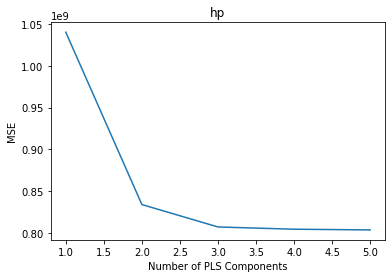

In [ ]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

### Final Model

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X_train.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
1930,3,1948,649.0,679,1183,1,1.0,308.0
497,8,2006,1422.0,1432,1432,2,2.0,492.0
1246,6,1954,832.0,832,832,1,2.0,528.0
952,6,1998,1204.0,1204,1204,2,2.0,412.0
1464,4,2005,1132.0,1132,1132,1,2.0,451.0


In [ ]:
# Fit the model
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

PLSRegression(n_components=3)

In [ ]:
# Get predictions
y_pred = pls.predict(scale(X_test))
y_pred

array([[267862.75382881],
       [178808.05055828],
       [120937.45266296],
       [120367.56487631],
       [255553.08040706],
       [160737.09317214],
       [207242.46883311],
       [133837.64542892],
       [184781.08290265],
       [124373.54691346],
       [201266.24913609],
       [176331.04890246],
       [166712.50354081],
       [223391.7691623 ],
       [ 48696.67041958],
       [ 86029.49404284],
       [319334.85120546],
       [243051.96425639],
       [192191.77057231],
       [253651.6652165 ],
       [157630.14230151],
       [136973.61512876],
       [137442.22303266],
       [221442.00689645],
       [313111.94393547],
       [155109.62544793],
       [243834.7119542 ],
       [257969.1153742 ],
       [205963.36802946],
       [281137.82244618],
       [207021.23737753],
       [192565.4185289 ],
       [248693.71378813],
       [193203.98768773],
       [129077.87909375],
       [178043.51628415],
       [267333.53427445],
       [158694.70152579],
       [3106

In [ ]:
# MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.14610338842440687

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Polynomial Regression</h2>
</div>

### Load libraries

In [ ]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load Data

In [ ]:
# Load the data
df = pd.read_csv("Datasets/hoursing_df_cleaned.csv", usecols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt'])
df.head()

,OverallQual,YearBuilt,GrLivArea,GarageArea,SalePrice
0,6,1960,1656,528.0,215000
1,5,1961,896,730.0,105000
2,6,1958,1329,312.0,172000
3,7,1968,2110,522.0,244000
4,5,1997,1629,482.0,189900


### Build Polynomial Features

The features created include:

- The bias (the value of 1.0) if include_bias = True
- Values raised to a power for each degree (e.g. x^1, x^2, x^3, …)
- Interactions between all pairs of features (e.g. x1 * x2, x1 * x3, …)

In [ ]:
# Split the dataset in X and y
X = df.drop(columns=['SalePrice'])
y = df[['SalePrice']]

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
# Fit transform the X dataset
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
# Check shape of X
X.shape

(2858, 4)

In [ ]:
# Check shape of new features
poly_features.shape

(2858, 14)

Total features are 14 now. 2 degrees of existing 4 features = 2*4 = 8. 6 interaction features between x1, x2, x3 and x4.

In [ ]:
poly_features

array([[6.000000e+00, 1.960000e+03, 1.656000e+03, ..., 2.742336e+06,
        8.743680e+05, 2.787840e+05],
       [5.000000e+00, 1.961000e+03, 8.960000e+02, ..., 8.028160e+05,
        6.540800e+05, 5.329000e+05],
       [6.000000e+00, 1.958000e+03, 1.329000e+03, ..., 1.766241e+06,
        4.146480e+05, 9.734400e+04],
       ...,
       [5.000000e+00, 1.992000e+03, 9.700000e+02, ..., 9.409000e+05,
        0.000000e+00, 0.000000e+00],
       [5.000000e+00, 1.974000e+03, 1.389000e+03, ..., 1.929321e+06,
        5.806020e+05, 1.747240e+05],
       [7.000000e+00, 1.993000e+03, 2.000000e+03, ..., 4.000000e+06,
        1.300000e+06, 4.225000e+05]])

Let's cross check the calculations of these features

In [ ]:
# First row of existing dataframe
X.iloc[0]

OverallQual       6.0
YearBuilt      1960.0
GrLivArea      1656.0
GarageArea      528.0
Name: 0, dtype: float64

In [ ]:
# First row of poly_features
poly_features[0]

array([6.000000e+00, 1.960000e+03, 1.656000e+03, 5.280000e+02,
       3.600000e+01, 1.176000e+04, 9.936000e+03, 3.168000e+03,
       3.841600e+06, 3.245760e+06, 1.034880e+06, 2.742336e+06,
       8.743680e+05, 2.787840e+05])

In [ ]:
# First 4 values of poly_features
poly_features[0][:4]

array([   6., 1960., 1656.,  528.])

As you can see the first 4 values of poly_feature are same as X. 

In [ ]:
# Squares of first 4 values of poly_features
poly_features[0][:4]**2

array([3.600000e+01, 3.841600e+06, 2.742336e+06, 2.787840e+05])

As you can see the 5th, 9th, 12th and 14th values of poly_feature are square of X values respectively.

Now let's see the interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  } x_1  \cdot x_4 $$

$$x_2  \cdot x_3 \text{  and  } x_2  \cdot x_4 $$

$$x_3  \cdot x_4 $$

In [ ]:
# x1.x2
X.iloc[0][0]*X.iloc[0][1]

11760.0

In [ ]:
# x1.x3
X.iloc[0][0]*X.iloc[0][2]

9936.0

In [ ]:
# x1.x4
X.iloc[0][0]*X.iloc[0][3]

3168.0

### Model Building - Poly features

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=1234)

In [ ]:
# Linear regression 
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [ ]:
# R square
model.score(X_train, y_train)

0.8396285643106358

In [ ]:
# Intercept
model.intercept_

array([-7678437.74795741])

In [ ]:
# Coeffecients
model.coef_

array([[-1.34286134e+05,  8.12084954e+03,  8.09535657e-01,
        -1.02376672e+03,  9.82684372e+02,  6.57527074e+01,
         5.55782904e+00,  1.07886015e+01, -2.12614162e+00,
         4.72179181e-03,  5.08993334e-01, -3.18363493e-04,
         1.82971165e-02, -1.42179495e-02]])

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.13618589110075244

### Model Building - Original Features

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
# Linear regression 
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [ ]:
# R square
model.score(X_train, y_train)

0.8074029202437273

In [ ]:
# Intercept
model.intercept_

array([-885083.07274933])

In [ ]:
# Coeffecients
model.coef_

array([[21003.8747536 ,   421.05838002,    53.29767669,    56.1005686 ]])

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.1504912050542914

As you can see the R2 of model with poly features is higher than the model with original features. The error is also less for model with poly features.

### Find the optimal degree for polynomial features

In [ ]:
# training mape
train_mape = []
# test mape
test_mape = []

for d in range(1,8):
    
    # Fit transform dataset for degree d
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Split the dataset in training and testing set
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Train the linear regression model on poly features
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Get predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate errors and append to the lists
    train_mape.append(mean_absolute_percentage_error(y_train, y_pred_train))
    test_mape.append(mean_absolute_percentage_error(y_test, y_pred_test))

In [ ]:
train_mape

[0.14358913464007497,
 0.13093823995447548,
 0.12295526665822284,
 0.11914193621013759,
 0.11584057284552898,
 0.13215024634228478,
 0.13747687245003956]

In [ ]:
test_mape

[0.14393802819321969,
 0.12917748466419973,
 0.1258132318732841,
 0.1277044490830984,
 0.133174696900748,
 0.18597324586020977,
 0.23843324815795794]

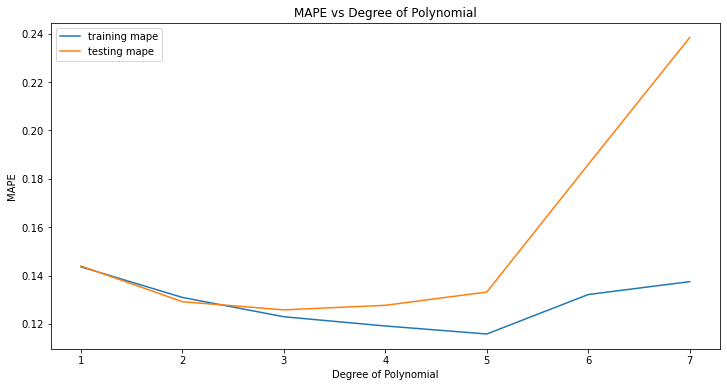

In [ ]:
# Let's plot the training and testing mape
plt.figure(figsize = (12,6))
plt.plot(range(1,8),train_mape,label='training mape')
plt.plot(range(1,8),test_mape,label='testing mape')
plt.xlabel("Degree of Polynomial")
plt.ylabel("MAPE")
plt.title("MAPE vs Degree of Polynomial")
plt.legend()
plt.show()

The optimal value of degree of polynomial is 3

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>RANSAC Regression</h2>
</div>

Example and data taken from 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

### Load libraries

In [ ]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load Data

In [ ]:
# Create the data
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [ ]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

### Model Building

In [ ]:
# Fit linear regression line using all data
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# Robustly fit linear model with RANSAC algorithm
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [ ]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

In [ ]:
# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


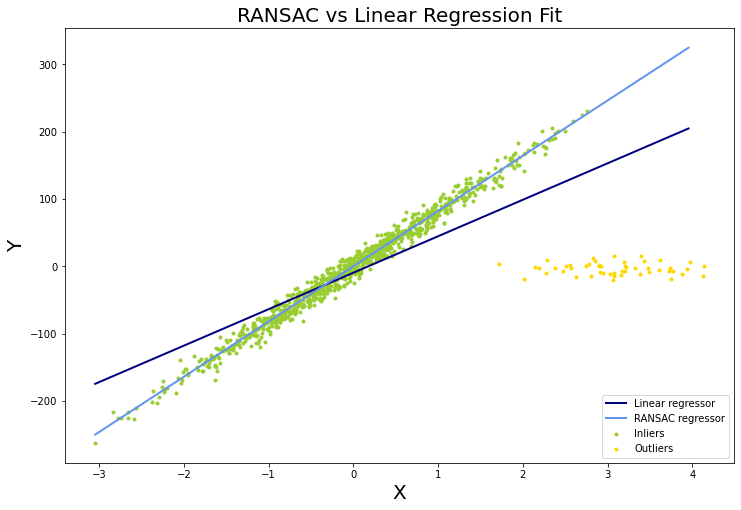

In [ ]:
# Plot the fits
plt.figure(figsize = (12,8))
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=2, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=2,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("X", fontsize = 20)
plt.ylabel("Y", fontsize = 20)
plt.title("RANSAC vs Linear Regression Fit", fontsize = 20)
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Theil Sen Regression</h2>
</div>

### Load libraries

In [ ]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TheilSenRegressor
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load Data

In [ ]:
# Create the data
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

In [ ]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

### Model Building

In [ ]:
# Fit linear regression line using all data
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
# Robustly fit linear model with Theil Sen algorithm
theilsen = TheilSenRegressor()
theilsen.fit(X, y)

TheilSenRegressor(max_subpopulation=10000)

In [ ]:
# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_theilsen = theilsen.predict(line_X)

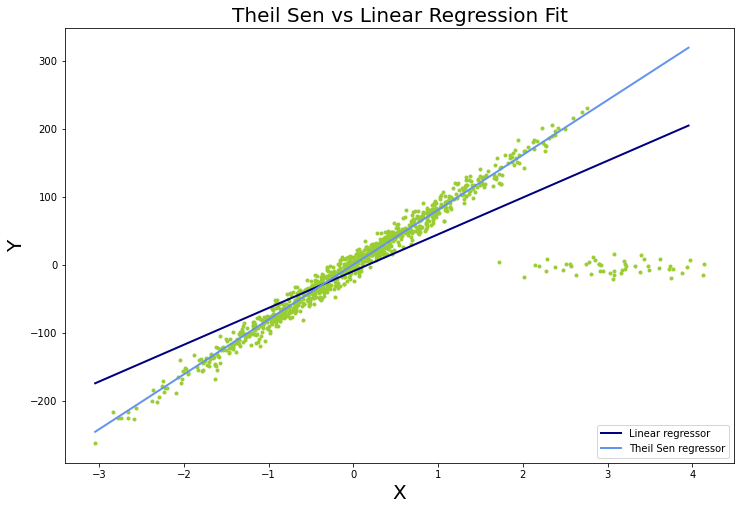

In [ ]:
# Plot the fits
plt.figure(figsize = (12,8))
plt.scatter(X, y, color="yellowgreen", marker=".")
plt.plot(line_X, line_y, color="navy", linewidth=2, label="Linear regressor")
plt.plot(line_X, line_y_theilsen, color="cornflowerblue", linewidth=2, label="Theil Sen regressor")
plt.legend(loc="lower right")
plt.xlabel("X", fontsize = 20)
plt.ylabel("Y", fontsize = 20)
plt.title("Theil Sen vs Linear Regression Fit", fontsize = 20)
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Quantile Regression</h2>
</div>

### Load libraries

In [ ]:
# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.formula.api import quantreg
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### Load Data

In [ ]:
# Load the data
df = pd.read_csv("Datasets/hoursing_df_cleaned.csv", usecols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath'])
df.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,6,1960,1080.0,1656,1656,1,2.0,528.0,215000
1,5,1961,882.0,896,896,1,1.0,730.0,105000
2,6,1958,1329.0,1329,1329,1,1.0,312.0,172000
3,7,1968,2110.0,2110,2110,2,2.0,522.0,244000
4,5,1997,928.0,928,1629,2,2.0,482.0,189900


### Model Building

In [ ]:
# Fit quantile regression line using only 1 feature. 
# The LAD (Least Absolute Deviation) model is a special case of quantile regression where q=0.5

mod = quantreg("SalePrice ~ GrLivArea", df)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              SalePrice   Pseudo R-squared:               0.3140
Model:                       QuantReg   Bandwidth:                   1.287e+04
Method:                 Least Squares   Sparsity:                    8.488e+04
Date:                Mon, 13 Dec 2021   No. Observations:                 2858
Time:                        16:41:31   Df Residuals:                     2856
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.796e+04   2638.891     10.596      0.000    2.28e+04    3.31e+04
GrLivArea     98.9788      1.706     58.025      0.000      95.634     102.324

The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


### Visualize the quantile regression

In [ ]:
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["GrLivArea"]] + res.conf_int().loc[
        "GrLivArea"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("SalePrice ~ GrLivArea", df).fit()
ols_ci = ols.conf_int().loc["GrLivArea"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["GrLivArea"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

      q             a           b          lb          ub
0  0.05  28482.309124   51.210428   43.899122   58.521734
1  0.15  30431.704885   66.301097   61.201516   71.400678
2  0.25  24169.811318   82.130966   77.268216   86.993715
3  0.35  28381.166030   88.328913   84.457459   92.200368
4  0.45  28086.957201   95.652173   92.184419   99.119928
5  0.55  27024.193548  102.318548   98.969333  105.667764
6  0.65  24539.636662  111.065235  107.446445  114.684026
7  0.75  16324.845589  125.700368  121.833761  129.566974
8  0.85   9999.999999  142.857143  138.377034  147.337251
9  0.95 -20149.814430  189.958763  183.614205  196.303321
{'a': 22924.84248689607, 'b': 103.33166431738223, 'lb': 99.46767694774327, 'ub': 107.1956516870212}


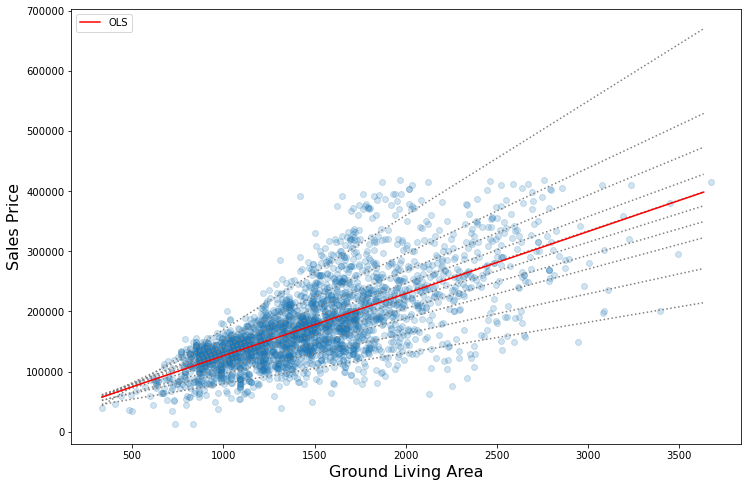

In [ ]:
# Draw Plot
x = np.arange(df.GrLivArea.min(), df.GrLivArea.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle="dotted", color="grey")

y = get_y(ols["a"], ols["b"])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(df.GrLivArea, df.SalePrice, alpha=0.2)
legend = ax.legend()
ax.set_xlabel("Ground Living Area", fontsize=16)
ax.set_ylabel("Sales Price", fontsize=16)
plt.show()

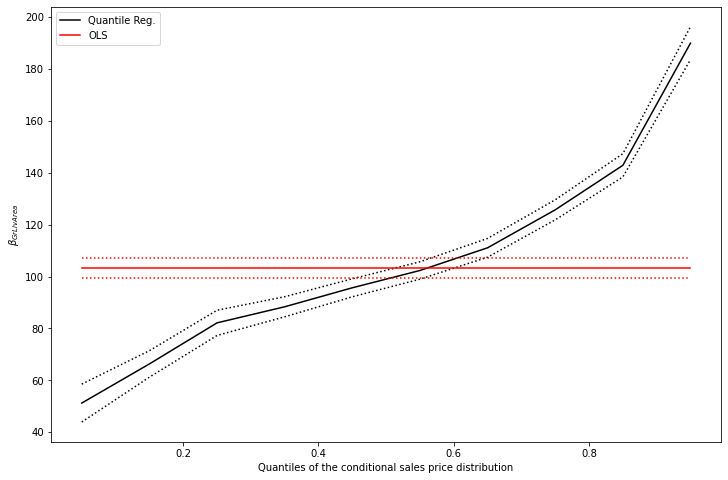

In [ ]:
# Change in coeffecients as per the quanitles
plt.figure(figsize = (12,8))
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
p4 = plt.plot(models.q, [ols["b"]] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols["lb"]] * n, linestyle="dotted", color="red")
p6 = plt.plot(models.q, [ols["ub"]] * n, linestyle="dotted", color="red")
plt.ylabel(r"$\beta_{GrLivArea}$")
plt.xlabel("Quantiles of the conditional sales price distribution")
plt.legend()
plt.show()